In [44]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

cwd = os.getcwd()
sys.path.append(cwd+"/../handy_functions")

from concat_pickles import get_outputs,print_df
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator

In [45]:
data_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/runs/all_decoders'
df = get_outputs(data_folder,0)
df.head(1)

,sess,repeat,outer_fold,nMT,nFEF,model,mean_R2,mean_rho,mean_R2_null,mean_rho_null
0,16,0,0,24,24,0,-0.011687,-0.025916,-0.010374,-0.011118


In [120]:
test_sess = df.loc[df['sess']==29].reset_index()
#test_melt = test_sess.melt(id_vars=['model','outer_fold'], value_vars=['mean_R2','mean_R2_null'],
#                           var_name='true_null', value_name='R2')
#test_melt.head(5)

test_max = test_sess.iloc[test_sess['mean_R2'].idxmax()]
test_max

index            934.000000
sess              29.000000
repeat             0.000000
outer_fold         6.000000
nMT               24.000000
nFEF              41.000000
model              6.000000
mean_R2            0.915612
mean_rho           0.957288
mean_R2_null      -0.004067
mean_rho_null     -0.003174
Name: 54, dtype: float64

[Text(0, 0.5, '')]

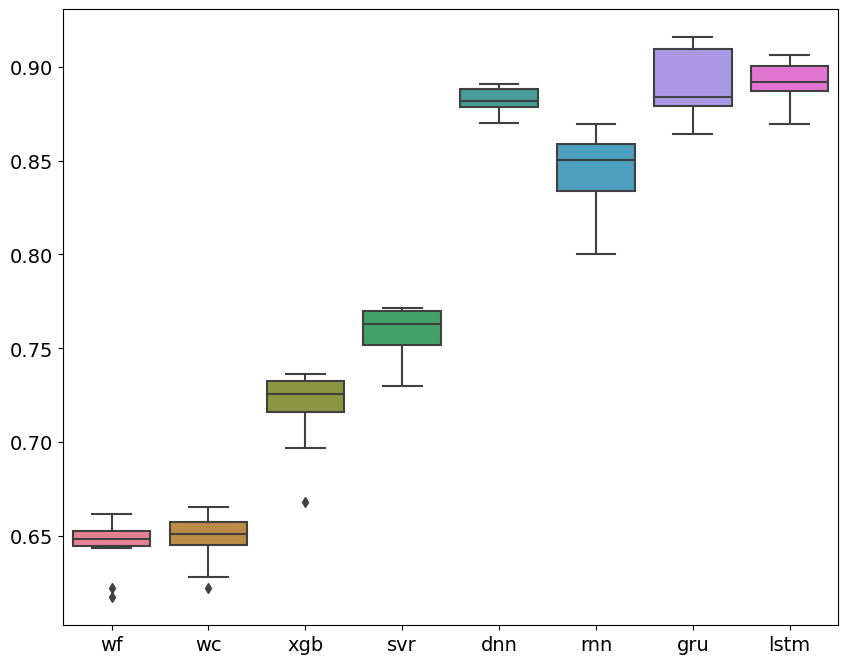

In [112]:
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(1,1, figsize=(10,8))

#'bad' sessions: 16
#'semi' sessions: 18,20,34,38
#'good' sessions: 19*,21,22,23*,24,25,27,28,29*,32,33,35,
hue_plot_params = {'data':df.loc[df['sess']==29], 'x':'model', 'y':'mean_R2', 'palette':'husl'}
a = sns.boxplot(ax=ax, **hue_plot_params)
a.set_xticklabels(['wf','wc','xgb','svr','dnn','rnn','gru','lstm'], rotation=0)
        
a.set(xlabel=None)
a.set(ylabel=None)


In [ ]:

hue_plot_params = [[],[],[]]
hue_plot_params[0] = {'data': df.loc[df['sess'] == sessions[s]],'x': 'model','y': 'r2',"hue": "Brain Area","palette": colors}
hue_plot_params[1] = {'data': df.loc[df['sess'] == sessions[s]],'x': 'model','y': 'rho',"hue": "Brain Area","palette": colors}
hue_plot_params[2] = {'data': df.loc[df['sess'] == sessions[s]],'x': 'model','y': 'time',"hue": "Brain Area","palette": colors}

wf_size = int((df[(df['sess']==sessions[s]) & (df['model']=='wf')].shape[0])/4)
wc_size = int((df[(df['sess']==sessions[s]) & (df['model']=='wc')].shape[0])/4)
dnn_size = int((df[(df['sess']==sessions[s]) & (df['model']=='dnn')].shape[0])/4)
print(wf_size)
print(wc_size)

a1 = sns.boxplot(ax=axes[s], **hue_plot_params[0])
annotator = Annotator(axes[s], pairs, **hue_plot_params[0])
annotator.configure(test="Mann-Whitney").apply_and_annotate()
axes[s].set_xticklabels(['wf (n = {})'.format(wf_size),'wc (n = {})'.format(wc_size),'dnn (n = {})'.format(dnn_size)], rotation=0)
a1.set(xlabel=None)
        a1.set(title='pa' + str(sessions[s])+' ({} MT, {} FEF)'.format(mt_perSess[s],fef_perSess[s]))
        
        if s==0:
            a1.set_ylabel('Prediction Accuracy ($R^2$)', fontsize = 16)
        else:
            a1.set(ylabel=None)
        
        if s!=len(sessions)-1:
            a1.get_legend().remove()
        else:    
            sns.move_legend(a1, "center left", bbox_to_anchor=(1, 0.65))  
            
fig.text(0.5, 0.01, 'model type', ha='center', fontsize=16)
fig.savefig(fig_folder+'ffmodels_r2_3sess.png', dpi=300, bbox_inches='tight')        